In [126]:
import numpy as np
import matplotlib.pyplot as plt

# 2.6-6

In [127]:
def newA(n):
    A=np.diag(np.linspace(1,n,n))
    B=np.diag(np.ones(n-1))
    C=np.diag(np.ones(n-2))
    A=A+(np.pad(B,((1,0),(0,1)))+np.pad(B,((0,1),(1,0)))+np.pad(C,((2,0),(0,2)))+np.pad(C,((0,2),(2,0))))/2
    return A

n=1000
A=newA(n)
b=np.dot(A,np.ones((n,1)))
error=np.zeros((1000,3))
print(A)
print(b)

[[1.00e+00 5.00e-01 5.00e-01 ... 0.00e+00 0.00e+00 0.00e+00]
 [5.00e-01 2.00e+00 5.00e-01 ... 0.00e+00 0.00e+00 0.00e+00]
 [5.00e-01 5.00e-01 3.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 9.98e+02 5.00e-01 5.00e-01]
 [0.00e+00 0.00e+00 0.00e+00 ... 5.00e-01 9.99e+02 5.00e-01]
 [0.00e+00 0.00e+00 0.00e+00 ... 5.00e-01 5.00e-01 1.00e+03]]
[[   2. ]
 [   3.5]
 [   5. ]
 [   6. ]
 [   7. ]
 [   8. ]
 [   9. ]
 [  10. ]
 [  11. ]
 [  12. ]
 [  13. ]
 [  14. ]
 [  15. ]
 [  16. ]
 [  17. ]
 [  18. ]
 [  19. ]
 [  20. ]
 [  21. ]
 [  22. ]
 [  23. ]
 [  24. ]
 [  25. ]
 [  26. ]
 [  27. ]
 [  28. ]
 [  29. ]
 [  30. ]
 [  31. ]
 [  32. ]
 [  33. ]
 [  34. ]
 [  35. ]
 [  36. ]
 [  37. ]
 [  38. ]
 [  39. ]
 [  40. ]
 [  41. ]
 [  42. ]
 [  43. ]
 [  44. ]
 [  45. ]
 [  46. ]
 [  47. ]
 [  48. ]
 [  49. ]
 [  50. ]
 [  51. ]
 [  52. ]
 [  53. ]
 [  54. ]
 [  55. ]
 [  56. ]
 [  57. ]
 [  58. ]
 [  59. ]
 [  60. ]
 [  61. ]
 [  62. ]
 [  63. ]
 [  64. ]
 [  65. 

In [128]:
def cholesky(A):
    n = A.shape[0]
    L = np.tril(A,0)
    for j in range(n):
        for k in range(j):
            L[j,j]=L[j,j]-L[j,k]**2
        L[j,j]=L[j,j]**(1/2)
        for i in range(j+1,n):
            for k in range(j):
                L[i,j]=L[i,j]-L[i,k]*L[j,k]
            L[i,j]=L[i,j]/L[j,j]
    return L

## 共轭梯度法

In [129]:
def conj_grad_method(A, b, x):
    global error
    r = b - np.dot(A,x)
    d = r
    for i in range(len(A)):
        alpha = np.dot(r.T,r) / np.dot(np.dot(d.T,A),d)
        x = x + alpha*d
        beta = np.dot((r - alpha*np.dot(A,d)).T, r - alpha*np.dot(A,d)) / np.dot(r.T,r)
        r = r - alpha*np.dot(A,d)
        d = r + beta*d
        error[i,0]=np.max(x-np.ones((n,1)))
        if np.max(r) < 1e-16:
            break
    return x

In [130]:
n=1000
A=newA(n)
b=np.dot(A,np.ones((n,1)))
x0=np.zeros((n,1))
print(conj_grad_method(A,b,x0))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

## 雅可比预条件子

In [131]:
def Jacobi_precond_method(A, b, x,iter=100):
    global error
    M = np.diag(np.diag(A))
    Mi= np.linalg.inv(M)
    r = b - np.dot(A,x)
    d = z = np.dot(Mi,r)
    for i in range(iter):
        alpha = np.dot(r.T,z) / np.dot(np.dot(d.T,A),d)
        x = x + alpha*d
        beta = np.dot((r - alpha*np.dot(A,d)).T, np.dot(Mi,r - alpha*np.dot(A,d))) / np.dot(r.T,z)
        r = r - alpha*np.dot(A,d)
        z = np.dot(Mi,r)
        d = z + beta*d
        error[i,1]=np.max(x-np.ones((n,1)))
        if np.max(r) < 1e-16:
            break
    return x

In [132]:
n=1000
A=newA(n)
b=np.dot(A,np.ones((n,1)))
x0=np.zeros((n,1))
print(Jacobi_precond_method(A,b,x0))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

## 高斯-赛德尔预条件子

In [133]:
def Gauss_Seidel_precond_method(A, b, x, w,iter=100):
    global error
    D = np.diag(np.diag(A))
    L = np.tril(A) - D
    U = np.triu(A) - D
    M = np.dot(np.dot(D+w*L,np.linalg.inv(D)), D+w*U)
    Mi= np.linalg.inv(M)
    r = b - np.dot(A,x)
    d = z = np.dot(Mi,r)
    for i in range(iter):
        alpha = np.dot(r.T,z) / np.dot(np.dot(d.T,A),d)
        x = x + alpha*d
        beta = np.dot((r - alpha*np.dot(A,d)).T, np.dot(Mi,r - alpha*np.dot(A,d))) / np.dot(r.T,z)
        r = r - alpha*np.dot(A,d)
        z = np.dot(Mi,r)
        d = z + beta*d
        error[i,2]=np.max(x-np.ones((n,1)))
        if np.max(r) < 1e-16:
            break
    return x

In [134]:
n=1000
A=newA(n)
b=np.dot(A,np.ones((n,1)))
x0=np.zeros((n,1))
print(Gauss_Seidel_precond_method(A,b,x0,1))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

## 前向误差

<ipython-input-141-98c2ae360763>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.linspace(1,n,n),np.log10(error[:,0]),'.',label='conj_grad_method')
<ipython-input-141-98c2ae360763>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.linspace(1,n,n),np.log10(error[:,1]),'.',label='Jacobi_precond_method')
<ipython-input-141-98c2ae360763>:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.linspace(1,n,n),np.log10(error[:,2]),'.',label='Gauss_Seidel_precond_method')


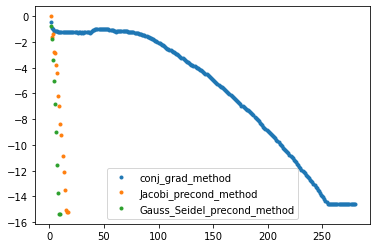

In [141]:
error
a=100
plt.plot(np.linspace(1,n,n),np.log10(error[:,0]),'.',label='conj_grad_method')
plt.plot(np.linspace(1,n,n),np.log10(error[:,1]),'.',label='Jacobi_precond_method')
plt.plot(np.linspace(1,n,n),np.log10(error[:,2]),'.',label='Gauss_Seidel_precond_method')
plt.legend()

# 2.6-7

In [136]:
def newA(n):
    A=np.diag(np.linspace(1,n,n))
    B=np.diag(np.ones(n-1))
    C=np.diag(np.ones(n-2))
    A=A+(np.pad(B,((1,0),(0,1)))+np.pad(B,((0,1),(1,0)))+np.pad(C,((2,0),(0,2)))+np.pad(C,((0,2),(2,0))))/2
    for i in range(n//2):
        A[i,2*i+1]=A[2*i+1,i]=1/2
    return A

n=1000
A=newA(n)
b=np.dot(A,np.ones((n,1)))
x0=np.zeros((n,1))
print(A)

[[1.00e+00 5.00e-01 5.00e-01 ... 0.00e+00 0.00e+00 0.00e+00]
 [5.00e-01 2.00e+00 5.00e-01 ... 0.00e+00 0.00e+00 0.00e+00]
 [5.00e-01 5.00e-01 3.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 9.98e+02 5.00e-01 5.00e-01]
 [0.00e+00 0.00e+00 0.00e+00 ... 5.00e-01 9.99e+02 5.00e-01]
 [0.00e+00 0.00e+00 0.00e+00 ... 5.00e-01 5.00e-01 1.00e+03]]


In [137]:
print(conj_grad_method(A,b,x0))
print(Jacobi_precond_method(A,b,x0))
print(Gauss_Seidel_precond_method(A,b,x0,1))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

<ipython-input-140-412523247d88>:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.linspace(1,n,n),np.log10(error[:,0]),'.',label='conj_grad_method')
<ipython-input-140-412523247d88>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.linspace(1,n,n),np.log10(error[:,1]),'.',label='Jacobi_precond_method')
<ipython-input-140-412523247d88>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.linspace(1,n,n),np.log10(error[:,2]),'.',label='Gauss_Seidel_precond_method')


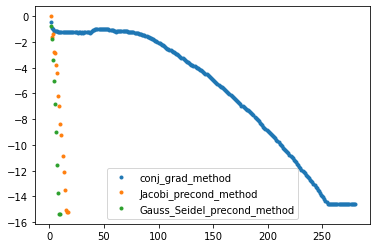

In [140]:
error
plt.plot(np.linspace(1,n,n),np.log10(error[:,0]),'.',label='conj_grad_method')
plt.plot(np.linspace(1,n,n),np.log10(error[:,1]),'.',label='Jacobi_precond_method')
plt.plot(np.linspace(1,n,n),np.log10(error[:,2]),'.',label='Gauss_Seidel_precond_method')
plt.legend()